Assignent 1 


### Large‐Scale ComputingforData Analytics


Silvia Bardoni



In [1]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import sys
from tqdm.notebook import tqdm
from sklearn.datasets import load_diabetes

np.set_printoptions(suppress=True)

*Task 1*

In [2]:
#Load data
diabetes_data = load_diabetes()

In [3]:
#help(load_diabetes) # description of dataset

In [4]:
# Load the diabetes dataset
x, y = load_diabetes(return_X_y=True)

In [5]:
print(x.shape)

(442, 10)


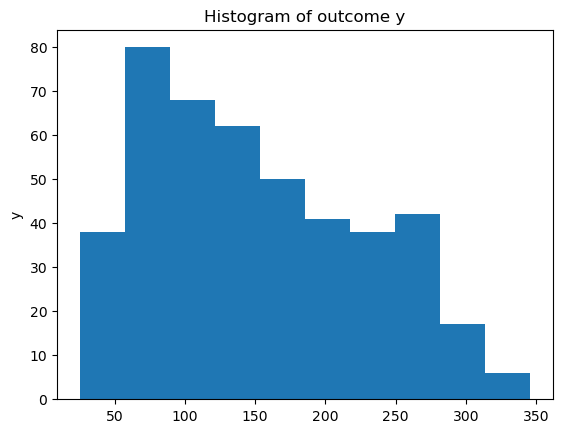

In [6]:
plt.hist(y)
plt.ylabel('y') 
plt.title("Histogram of outcome y") 
plt.show()

**Comment:** the histogram is right_skewed 

*Task 2*

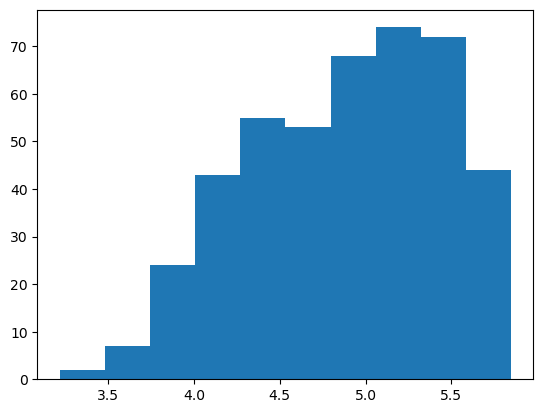

In [7]:
#log the outcome
y_log = np.log(y)
plt.hist(y_log)
plt.show()

In [8]:
# Split the data into training/testing sets, rounding the split down to the nearest integer
split = 0.8
N = len(y)
sample = int(split*N)

x_train, x_test, y_train, y_test = x[:sample,:], x[sample:, :], y_log[:sample, ], y_log[sample:,]

*Task 3*

In [9]:
x_train.shape

(353, 10)

In [10]:
bmi_train = x_train[:, np.newaxis, 2]
#diabetes_X = diabetes_X[:, np.newaxis, 2]

In [11]:
bmi_train.shape

(353, 1)

In [1]:
#Create variables to train
b0 = tf.Variable(2.0, dtype=tf.float6)   # initialised as per task4
b1 = tf.Variable(0.0, dtype=tf.float6)   # initialised as per task4

NameError: name 'tf' is not defined

Define statistical model

In [13]:
def LinearModel(x):
   return tf.add(tf.multiply(x, b1), b0)

In [14]:
# mean squared error
def loss(y, pred):
    return tf.reduce_mean(tf.square(y - pred))

*Task4*

In [15]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01) 

In [16]:
epochs = range(5000)

# for i in epochs:
#     with tf.GradientTape() as tape:
#         predicted = LinearModel(bmi_train) 
#         current_loss = loss(y_train, predicted)
#     gradients = tape.gradient(current_loss, [b1, b0])
#     optimizer.apply_gradients(zip(gradients, [b1 ,b0])) 
#     print('b0:' + str(b0) + 'b1:' + str(b1) + '  Loss = ' + str(current_loss))

In [17]:
# b0:<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.88045>b1:<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.0016975352>  Loss = tf.Tensor(0.30220282, shape=(), dtype=float32)

Using Tensorboard for *Task5*

In [28]:
# Reinitialize variables to train
b0 = tf.Variable(2.0, dtype=tf.float64)   # initialised as per task4
b1 = tf.Variable(0.0, dtype=tf.float64)   # initialised as per task4

#adding prints for coefficients
def LinearModel(x):
    tf.print(b0, output_stream=sys.stdout)
    tf.print(b1, output_stream=sys.stdout)
    return tf.add(tf.multiply(x, b1), b0)
    
# mean absolute error
def loss_mae(y_true, y_pred):
    return (tf.reduce_mean(tf.abs(tf.Variable(y_true) - y_pred)))

In [29]:
# Set up logging jupiterhub tensorboard
logdir = '/home/jovyan/logs/Silvia'
writer = tf.summary.create_file_writer(logdir)

with writer.as_default(): # use the contex manager to specify the writer
    for i in tqdm(epochs):
        with tf.GradientTape() as tape:
            predicted = LinearModel(bmi_train) 
            current_loss = loss_mae(y_train, predicted)
        gradients = tape.gradient(current_loss, [b1, b0])
        optimizer.apply_gradients(zip(gradients, [b1 ,b0]))
        # write the value to tensorboard summary stats
        if i%20 ==0: #every 20 time steps
            tf.summary.scalar('loss', current_loss, step=i)  #this is a single number

  0%|          | 0/5000 [00:00<?, ?it/s]

2
0
2.0099999997764826
-6.0011002141583047e-06
2.0199999995529652
-1.2002200428316609e-05
2.0299999993294477
-1.8003300642474915e-05
2.0399999991059303
-2.4004400856633219e-05
2.0499999988824129
-3.0005501070791523e-05
2.0599999986588955
-3.600660128494983e-05
2.0699999984353781
-4.2007701499108137e-05
2.0799999982118607
-4.8008801713266444e-05
2.0899999979883432
-5.4009901927424752e-05
2.0999999977648258
-6.0011002141583059e-05
2.1099999975413084
-6.6012102355741359e-05
2.119999997317791
-7.201320256989966e-05
2.1299999970942736
-7.801430278405796e-05
2.1399999968707561
-8.4015402998216261e-05
2.1499999966472387
-9.0016503212374561e-05
2.1599999964237213
-9.6017603426532862e-05
2.1699999962002039
-0.00010201870364069116
2.1799999959766865
-0.00010801980385484946
2.1899999957531691
-0.00011402090406900776
2.1999999955296516
-0.00012002200428316606
2.2099999953061342
-0.00012602310449732438
2.2199999950826168
-0.00013202420471148269
2.2299999948590994
-0.000138025304925641
2.23999999463